In [54]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAGothic')
import numpy as np
import statsmodels.api as sm

In [55]:
train = pd.read_csv('C:\\Users\\Riyansika\\Desktop\\mith exam\\mith time series\\data.csv' ,usecols=['date','sales','outlet','state','category_of_product','product_identifier','department_identifier'],parse_dates=['date'],index_col='date')#('../input/train.csv' ,parse_dates=['date'],index_col='date')
test = pd.read_csv('C:\\Users\\Riyansika\\Desktop\\mith exam\\mith time series\\test.csv',usecols=['date','outlet','state','category_of_product','product_identifier','department_identifier'], parse_dates=['date'],index_col='date')#('../input/test.csv', parse_dates=['date'],index_col='date')
df = pd.concat([train,test],sort=True)
sample = pd.read_csv('C:\\Users\\Riyansika\\Desktop\\mith exam\\mith time series\\submission.csv')#('../input/sample_submission.csv')

In [56]:
df.head()

,category_of_product,department_identifier,outlet,product_identifier,sales,state
date,,,,,,
2012-01-01,others,11,111,74,0.0,Maharashtra
2012-01-01,others,11,111,337,1.0,Maharashtra
2012-01-01,others,12,111,423,0.0,Maharashtra
2012-01-01,others,12,111,432,0.0,Maharashtra
2012-01-01,fast_moving_consumer_goods,21,111,581,0.0,Maharashtra


train.product_identifier.unique(),train.department_identifier.unique()

(array([  74,  337,  423,  432,  581,  611,  631,  659,  743,  797,  868,
         904,  926,  972,  973, 1054, 1135, 1173, 1190, 1196, 1228, 1240,
        1242, 1275, 1322, 1328, 1365, 1424, 1472, 1508, 1542, 1548, 1599,
        1629, 1672, 1694, 1727, 1753, 2294, 2332, 2492, 2768, 2794, 2818,
        2853, 2932, 2935, 3004, 3008, 3021], dtype=int64),
 array([11, 12, 21, 22, 31, 33], dtype=int64))

In [57]:
df.state.unique(),df.outlet.unique()

(array(['Maharashtra', 'Telangana', 'Kerala'], dtype=object),
 array([111, 112, 113, 114, 221, 222, 223, 331, 332, 333], dtype=int64))

In [5]:
buf = df[(df.product_identifier==74)&(df.outlet==111)].copy()

In [6]:
buf.head()

,category_of_product,department_identifier,outlet,product_identifier,sales,state
date,,,,,,
2012-01-01,others,11,111,74,0.0,Maharashtra
2012-01-02,others,11,111,74,0.0,Maharashtra
2012-01-03,others,11,111,74,1.0,Maharashtra
2012-01-04,others,11,111,74,0.0,Maharashtra
2012-01-05,others,11,111,74,0.0,Maharashtra


findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans.


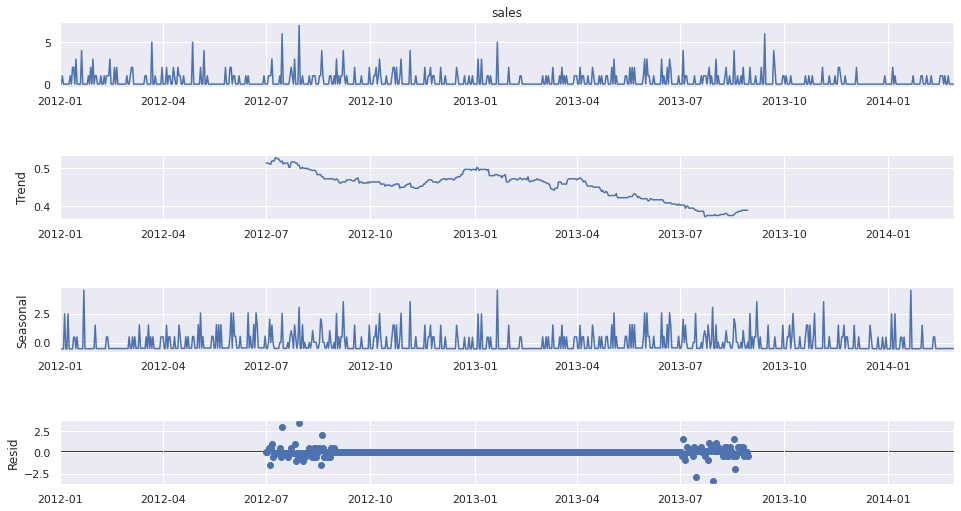

In [7]:
res = sm.tsa.seasonal_decompose(buf.sales.dropna(),freq=365)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [8]:
train.index.min(),train.index.max(),test.index.min(),test.index.max(),

(Timestamp('2012-01-01 00:00:00'),
 Timestamp('2014-02-28 00:00:00'),
 Timestamp('2014-03-01 00:00:00'),
 Timestamp('2014-03-31 00:00:00'))

In [9]:
#train_test_split
tr_start,tr_end = '2012-01-01','2013-12-31'
te_start,te_end = '2014-01-01','2014-02-28'
tra = buf['sales'][tr_start:tr_end].dropna()
tes = buf['sales'][te_start:te_end].dropna()

We can use ADF-test to check stationary of the data.

In [10]:
tes

date
2014-01-01    0.0
2014-01-02    0.0
2014-01-03    0.0
2014-01-04    0.0
2014-01-05    2.0
2014-01-06    0.0
2014-01-07    1.0
2014-01-08    0.0
2014-01-09    0.0
2014-01-10    0.0
2014-01-11    0.0
2014-01-12    0.0
2014-01-13    0.0
2014-01-14    0.0
2014-01-15    0.0
2014-01-16    0.0
2014-01-17    0.0
2014-01-18    0.0
2014-01-19    0.0
2014-01-20    0.0
2014-01-21    0.0
2014-01-22    0.0
2014-01-23    1.0
2014-01-24    0.0
2014-01-25    0.0
2014-01-26    0.0
2014-01-27    0.0
2014-01-28    0.0
2014-01-29    0.0
2014-01-30    1.0
2014-01-31    1.0
2014-02-01    0.0
2014-02-02    0.0
2014-02-03    0.0
2014-02-04    1.0
2014-02-05    0.0
2014-02-06    0.0
2014-02-07    0.0
2014-02-08    1.0
2014-02-09    0.0
2014-02-10    0.0
2014-02-11    0.0
2014-02-12    0.0
2014-02-13    0.0
2014-02-14    0.0
2014-02-15    0.0
2014-02-16    1.0
2014-02-17    1.0
2014-02-18    1.0
2014-02-19    0.0
2014-02-20    1.0
2014-02-21    0.0
2014-02-22    0.0
2014-02-23    1.0
2014-02-24    0.0
2014-

In [11]:
#ADF-test(Original-time-series)
res = sm.tsa.adfuller(buf['sales'].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:0.0


In [12]:
#ADF-test(differenced-time-series)
res = sm.tsa.adfuller(buf['sales'].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:1.6073260811657734e-24


What is adfuller method parameter 'regression'?
- ’c’ : constant only (default)
- ’ct’ : constant and trend
- ’ctt’ : constant, and linear and quadratic trend
- ’nc’ : no constant, no trend

[https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html) 


It's important to choose carefully a period of the data which will be used in predicting. Because, The results depend on the period.

In [13]:
#ADF-test(Original-time-series)
res = sm.tsa.adfuller(buf['sales']['2013-01-01':].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:0.0


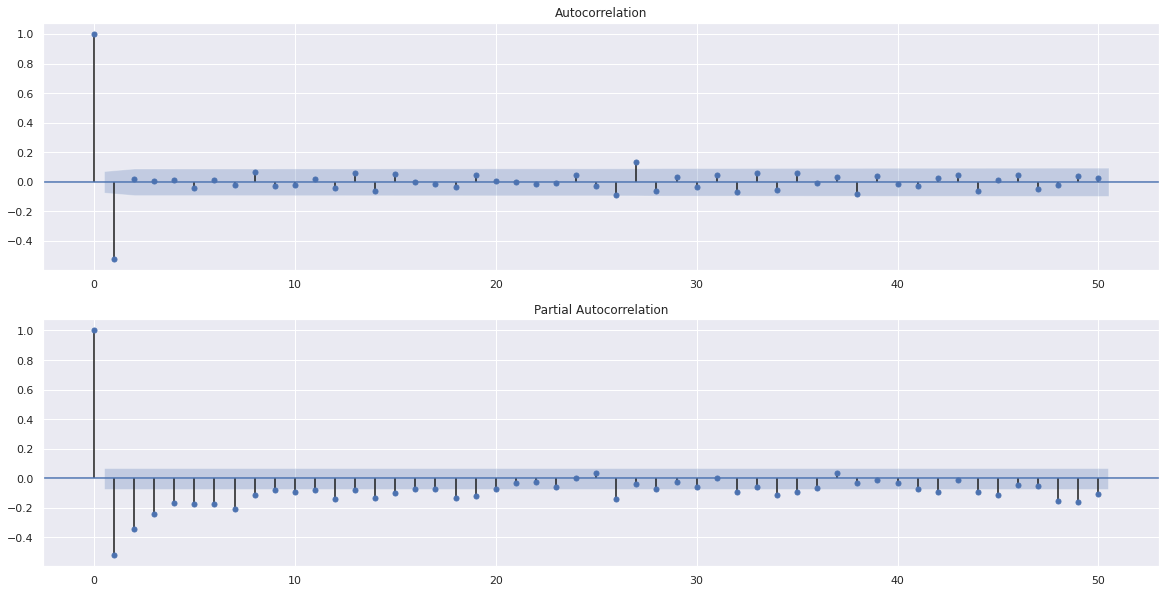

In [14]:
#we use tra.diff()(differenced data), because this time series is unit root process.
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(tra.diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(tra.diff().dropna(), lags=50, ax=ax[1])
plt.show()

1. if we use arma_order_select_ic method, it is very easy to search best parameters(p,q) of ARMA model.

In [15]:
resDiff = sm.tsa.arma_order_select_ic(tra, max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

C:\Users\Riyansika\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Riyansika\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Riyansika\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Riyansika\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Riyansika\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: M

ARMA(p,q) = (5, 4) is the best.


C:\Users\Riyansika\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


We got parameters (5,0,4).

#### We can use SARIMAX model as ARIMAX when seasonal_order is (0,0,0,0) .

In [16]:
arima = sm.tsa.statespace.SARIMAX(tra,order=(5,0,4),freq='D',seasonal_order=(0,0,0,0),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
arima.summary()


C:\Users\Riyansika\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Riyansika\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  731
Model:               SARIMAX(5, 0, 4)   Log Likelihood                -977.019
Date:                Mon, 27 Apr 2020   AIC                           1974.038
Time:                        14:07:56   BIC                           2019.913
Sample:                    01-01-2012   HQIC                          1991.741
                         - 12-31-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3900      0.418     -0.932      0.351      -1.210       0.430
ar.L2         -0.0871      0.205     -0.425      0.671      -0.488       0.314
ar.L3          0.5160      0.211      2.444      0.015       0.102       0.930
ar.L4          0.9032      0.400      2.257      0.024       0.119       1.687
ar.L5          0.0547      0.061      0.901      0.368      -0.064       0.174
ma.L1          0.3350      0.434      0.771      0.440      -0.516       1.186
ma.L2          0.0654      0.314      0.208      0.835      -0.550       0.681
ma.L3         -0.5238      0.279     -1.876      0.061      -1.071       0.023
ma.L4         -0.8776      0.498     -1.764      0.078      -1.853       0.098
sigma2         0.8533      0.235      3.636      0.000       0.393       1.313
===================================================================================
Ljung-Box (Q):                       62.08   Jarque-Bera (JB):              3858.49
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             2.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This model's resid have few autocorrelation.  
It means that We were able to make a good model.

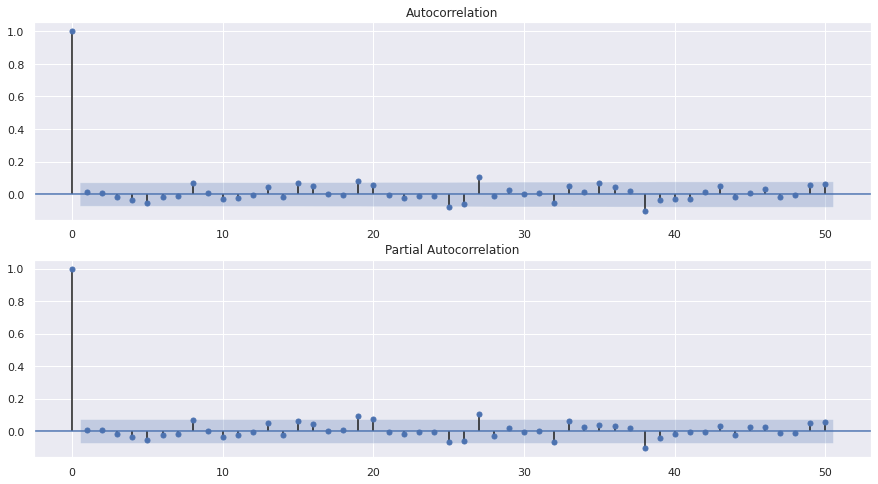

In [17]:
res = arima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
pred = arima.predict(tr_end,te_end)[1:]
print('ARIMA model MSE:{}'.format(mean_squared_error(tes,pred)))

ARIMA model MSE:0.2244837843761233


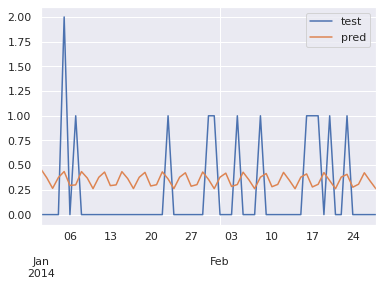

In [19]:
pd.DataFrame({'test':tes,'pred':pred}).plot();plt.show()

## SARIMA

In [20]:
#(0, 0, 1)x(0, 1, 1, 12)

sarima = sm.tsa.statespace.SARIMAX(tra,order=(0,0,1),seasonal_order=(0,1,1,12),
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
sarima.summary()

C:\Users\Riyansika\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                  731
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -963.711
Date:                            Mon, 27 Apr 2020   AIC                           1933.422
Time:                                    14:07:58   BIC                           1947.097
Sample:                                01-01-2012   HQIC                          1938.707
                                     - 12-31-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0411      0.054     -0.757      0.449      -0.148       0.065
ma.S.L12      -1.0000     16.166     -0.062      0.951     -32.685      30.685
sigma2         0.8504     13.754      0.062      0.951     -26.106      27.807
===================================================================================
Ljung-Box (Q):                       58.49   Jarque-Bera (JB):              3042.48
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             2.55
Prob(H) (two-sided):                  0.01   Kurtosis:                        11.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

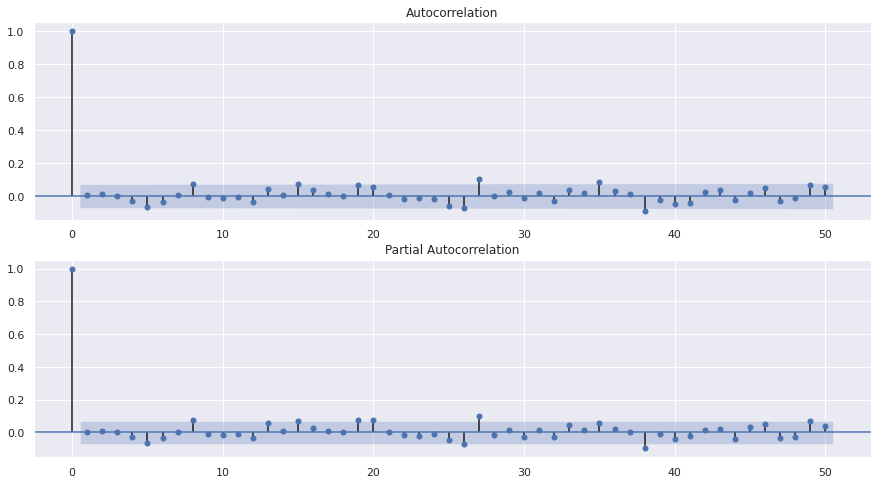

In [21]:
res = sarima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
pred = sarima.predict(tr_end,te_end)[1:]
print('SARIMA model MSE:{}'.format(mean_squared_error(tes,pred)))

SARIMA model MSE:0.275193659114978


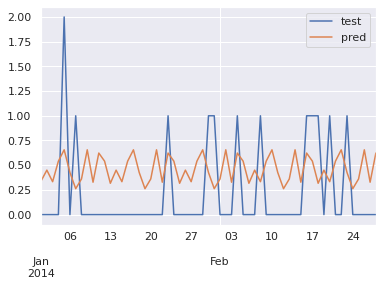

In [23]:
pd.DataFrame({'test':tes,'pred':pred}).plot();plt.show()

# Make features1

Let's try to make some features.
- month
- dayofweek

Sales gropu by month

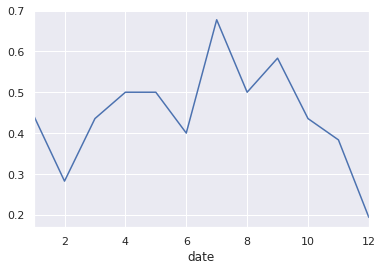

In [24]:
buf.groupby(buf.index.month).sales.mean().plot();plt.show()

Sales gropu by day of the week.

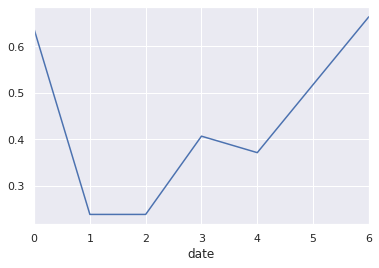

In [25]:
buf.groupby(buf.index.weekday).sales.mean().plot();plt.show()

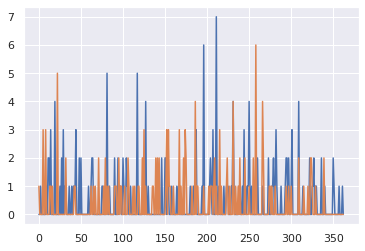

In [26]:
plt.plot(buf[0:363].sales.dropna().values)
plt.plot(buf[364:727].sales.dropna().values);plt.show()

SARIMA TUNING DONE ON kaggle kernal:https://www.kaggle.com/chandra03/how-to-use-sarimax-and-arimax/edit

we got best_parms and best_AIC as : 

SARIMAX(7, 1, 7)x(1, 0, 7, 1) - AIC:5970.831754744624 - MSE:26.665358441642866
SARIMAX(7, 1, 7)x(7, 0, 6, 1) - AIC:5968.258690396593 - MSE:24.276314556818257
SARIMAX(7, 1, 7)x(1, 0, 2, 12) - AIC:5881.77390451937 - MSE:26.20244406957662

In [58]:
df.head()

,category_of_product,department_identifier,outlet,product_identifier,sales,state
date,,,,,,
2012-01-01,others,11,111,74,0.0,Maharashtra
2012-01-01,others,11,111,337,1.0,Maharashtra
2012-01-01,others,12,111,423,0.0,Maharashtra
2012-01-01,others,12,111,432,0.0,Maharashtra
2012-01-01,fast_moving_consumer_goods,21,111,581,0.0,Maharashtra


In [59]:
#month one hot encoding
df['month'] = df.index.month
month_dummies = pd.get_dummies(df['month'])
month_dummies.columns = ['month-'+ str(m) for m in range(1,13)]
df = pd.concat([df, month_dummies], axis=1, join_axes=[df.index]).drop(['month'],axis=1)
#dayofweek one hot encoding
df['dayofweek'] = df.index.weekday
week_dummies = pd.get_dummies(df['dayofweek'])
week_dummies.columns = ['dayofweek-'+ str(w) for w in range(0,7)]
df = pd.concat([df, week_dummies], axis=1, join_axes=[df.index]).drop(['dayofweek'],axis=1)
#Satday,Sunday
df['weekend'] = (df.index.dayofweek>4).astype(int)#Satday,Sunday


tr_start,tr_end = '2012-01-01','2013-12-31'
te_start,te_end = '2014-01-01','2014-02-28'

In [62]:
df.columns

Index(['category_of_product', 'department_identifier', 'outlet',
       'product_identifier', 'sales', 'state', 'month-1', 'month-2', 'month-3',
       'month-4', 'month-5', 'month-6', 'month-7', 'month-8', 'month-9',
       'month-10', 'month-11', 'month-12', 'dayofweek-0', 'dayofweek-1',
       'dayofweek-2', 'dayofweek-3', 'dayofweek-4', 'dayofweek-5',
       'dayofweek-6', 'weekend'],
      dtype='object')

In [63]:
col = ['category_of_product', 'department_identifier', 'outlet','product_identifier', 'sales', 'state']

In [65]:
results = []
tr_start,tr_end = '2012-01-01','2013-12-31'
te_start,te_end = '2014-01-01','2014-02-28'
for i in df.product_identifier.unique():
    for s in df.outlet.unique():
        buf = df[(df.product_identifier==i)&(df.outlet==s)].copy()
        #buf['sales_shifted_728'] = buf.sales.shift(728)
        #buf['sales_shifted_364'] = buf.sales.shift(364)
        #target_exog = buf[~buf.id.isnull()].drop(['id','store','item','sales'],axis = 1)#exog for predict.
        target_exog = buf[te_start:].drop(col,axis = 1)#exog for predict.
        
        #train_test_split
        tra = buf['sales'][tr_start:tr_end]#.dropna()
        tes = buf['sales'][te_start:te_end]#.dropna()
        exog_train = buf.drop(col,axis = 1)[tr_start:tr_end]#.dropna()
        #exog_test = buf.drop(['id','store','item','sales'],axis = 1)[te_start:te_end]#.dropna()
        
        #fitting
        mod = sm.tsa.statespace.SARIMAX(tra,order=(7,1,7),seasonal_order=(1,0,4,12),exog = exog_train,freq='D',
                                       enforce_stationarity=False, enforce_invertibility=False).fit()
        pred = mod.get_prediction(tr_end,'2014-03-31',exog =target_exog)#pd.concat([exog_test,target_exog]))
        results.extend(pred.predicted_mean['2014-03-01':])
        print('product_identifier:',i,'outlet:',s,'Finished.')

product_identifier: 74 outlet: 111 Finished.
product_identifier: 74 outlet: 112 Finished.
product_identifier: 74 outlet: 113 Finished.
product_identifier: 74 outlet: 114 Finished.
product_identifier: 74 outlet: 221 Finished.
product_identifier: 74 outlet: 222 Finished.
product_identifier: 74 outlet: 223 Finished.
product_identifier: 74 outlet: 331 Finished.
product_identifier: 74 outlet: 332 Finished.
product_identifier: 74 outlet: 333 Finished.
product_identifier: 337 outlet: 111 Finished.
product_identifier: 337 outlet: 112 Finished.
product_identifier: 337 outlet: 113 Finished.
product_identifier: 337 outlet: 114 Finished.
product_identifier: 337 outlet: 221 Finished.
product_identifier: 337 outlet: 222 Finished.
product_identifier: 337 outlet: 223 Finished.
product_identifier: 337 outlet: 331 Finished.
product_identifier: 337 outlet: 332 Finished.
product_identifier: 337 outlet: 333 Finished.
product_identifier: 423 outlet: 111 Finished.
product_identifier: 423 outlet: 112 Finished

product_identifier: 1173 outlet: 332 Finished.
product_identifier: 1173 outlet: 333 Finished.
product_identifier: 1190 outlet: 111 Finished.
product_identifier: 1190 outlet: 112 Finished.
product_identifier: 1190 outlet: 113 Finished.
product_identifier: 1190 outlet: 114 Finished.
product_identifier: 1190 outlet: 221 Finished.
product_identifier: 1190 outlet: 222 Finished.
product_identifier: 1190 outlet: 223 Finished.
product_identifier: 1190 outlet: 331 Finished.
product_identifier: 1190 outlet: 332 Finished.
product_identifier: 1190 outlet: 333 Finished.
product_identifier: 1196 outlet: 111 Finished.
product_identifier: 1196 outlet: 112 Finished.
product_identifier: 1196 outlet: 113 Finished.
product_identifier: 1196 outlet: 114 Finished.
product_identifier: 1196 outlet: 221 Finished.
product_identifier: 1196 outlet: 222 Finished.
product_identifier: 1196 outlet: 223 Finished.
product_identifier: 1196 outlet: 331 Finished.
product_identifier: 1196 outlet: 332 Finished.
product_ident

product_identifier: 1694 outlet: 114 Finished.
product_identifier: 1694 outlet: 221 Finished.
product_identifier: 1694 outlet: 222 Finished.
product_identifier: 1694 outlet: 223 Finished.
product_identifier: 1694 outlet: 331 Finished.
product_identifier: 1694 outlet: 332 Finished.
product_identifier: 1694 outlet: 333 Finished.
product_identifier: 1727 outlet: 111 Finished.
product_identifier: 1727 outlet: 112 Finished.
product_identifier: 1727 outlet: 113 Finished.
product_identifier: 1727 outlet: 114 Finished.
product_identifier: 1727 outlet: 221 Finished.
product_identifier: 1727 outlet: 222 Finished.
product_identifier: 1727 outlet: 223 Finished.
product_identifier: 1727 outlet: 331 Finished.
product_identifier: 1727 outlet: 332 Finished.
product_identifier: 1727 outlet: 333 Finished.
product_identifier: 1753 outlet: 111 Finished.
product_identifier: 1753 outlet: 112 Finished.
product_identifier: 1753 outlet: 113 Finished.
product_identifier: 1753 outlet: 114 Finished.
product_ident

outlet:array([111, 112, 113, 114, 221, 222, 223, 331, 332, 333], dtype=int64)

product_identifier:
array([  74,  337,  423,  432,  581,  611,  631,  659,  743,  797,  868,
        904,  926,  972,  973, 1054, 1135, 1173, 1190, 1196, 1228, 1240,
       1242, 1275, 1322, 1328, 1365, 1424, 1472, 1508, 1542, 1548, 1599,
       1629, 1672, 1694, 1727, 1753, 2294, 2332, 2492, 2768, 2794, 2818,
       2853, 2932, 2935, 3004, 3008, 3021], dtype=int64)

In [66]:
sample['sales'] = results
sample.to_csv('C:\\Users\\Riyansika\\Desktop\\mith exam\\mith time series\\submission_Arima_sarima\\submission.csv',index=False)